Given a bam file containing unique mapped reads, we build a statistics taking into account the frequency of co-occurrences of each read locations. In computational linguistic terminology, for each chromosome, the location is the word and the document can be a given genomic region (entire chromosome, the genome, or a bin).  

In [1]:
import sys
import csv
import numpy as np
import pandas as pd
import os.path
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim, logging
from os import listdir
from os.path import isfile, join

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
###############################################################                                                                                                                                             
import sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer

We build a document-term matrix from chromosomes data:

In [2]:
vectorizer = CountVectorizer(min_df=1) # set the min numb of times a word can occur
corpus = open('/home/garner1/Work/dataset/readcountLP/chr1.tsv')
dtm = vectorizer.fit_transform(corpus) # get document-term matrix                                                                                                                                           
vocab = vectorizer.get_feature_names() # a list                                                                                                                                                             

Since the word co-occurrence matrix is by definition W=D^T*D, from the singular value decomposition of D=USV^T it follows W=D^T*D=VSU^T*USV^T=V*S^2*V^T. Since SVD of W is computationally expensive (even memory wise 128G of RAM are not enough) it is necessary to perform SVD on D.

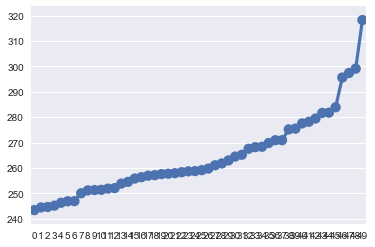

In [16]:
from scipy.sparse.linalg import svds, eigs

u, s, vt = svds(dtm.asfptype(), k=50)
import seaborn as sns
sns.set(color_codes=True)
sns.pointplot(range(len(s)),s)

In [9]:
print (dtm.shape)
print (vt.shape)

(458, 685073)
(10, 685073)


Looking at the frequency of genomic locations we can see how the vast majority is unique, and there is a fast decay of the number of locations in terms of their repeats: most are unique and few are highly repeated.

In [ ]:
dtm_word = dtm.sum(axis=0)
print (dtm_word.shape)

%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

ax = sns.distplot(dtm_word[(dtm_word<100) & (dtm_word>0)], bins=20, kde=False)
ax.set_yscale('log')
ax.set_ylabel('number of locations occurring x times')
ax.set_xlabel('x = number of times a location is re-occurring')

A term-term co-occurence matrix is obtained as the product of dtm.T * dtm. This also is a sparse matrix and, after truncated SVD, we can identify main eigenwords:

In [ ]:
wwm = dtm.transpose().dot(dtm)      # build word-word matrix

In [ ]:
from bokeh.plotting import figure, output_file, show

# prepare some data
mode = 8
#x = range(len(u[:,vec]))
#y = u[:,vec]
x = range(len(vt[mode,:]))
y = vt[mode,:]

# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="eigenword", x_axis_label='word', y_axis_label='y')

# add a line renderer with legend and line thickness
p.circle(x, y, legend="Eigenword from co-occurrence matrix", size=3)

# show the results
show(p)